Importing libraries

In [251]:
#data handling
import pandas as pd
import numpy as np
import os 

# Machine learning (non deep learning)
import sklearn
from sklearn.linear_model import LogisticRegression

# Deep learning
import tensorflow as tf
import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

Read in csv data from file

In [239]:
tumor_labels = pd.read_csv("dataset/label.csv")

In [242]:
tumor_labels

,file_name,label
0,IMAGE_0000.jpg,tumor
1,IMAGE_0001.jpg,no tumor
2,IMAGE_0002.jpg,tumor
3,IMAGE_0003.jpg,tumor
4,IMAGE_0004.jpg,tumor
...,...,...
2995,IMAGE_2995.jpg,no tumor
2996,IMAGE_2996.jpg,tumor
2997,IMAGE_2997.jpg,tumor
2998,IMAGE_2998.jpg,tumor


In [241]:
for i in range(len(tumor_labels)):
    if (tumor_labels.iloc[i]["label"] == "no_tumor"):
        tumor_labels.iloc[i]["label"] = "no tumor"
    else: 
        tumor_labels.iloc[i]["label"] = "tumor"

In [203]:
tumor_labels['label'] = np.where(tumor_labels['label'] == "no_tumor", "no tumor", tumor_labels['label'])
tumor_labels['label'] = np.where(tumor_labels['label'] != "no tumor", "tumor", tumor_labels['label'])

In [247]:
list(tumor_labels['label'])

['tumor',
 'no tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'no tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'no tumor',
 'no tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'no tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'no tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'no tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'no tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'no tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 'tumor',
 't

Text(0.5, 1.0, 'Tumor dataset - probability')

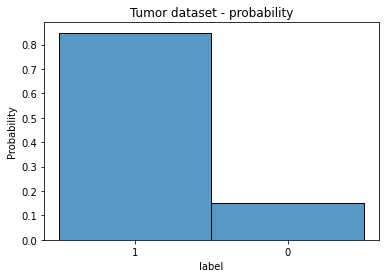

In [185]:
sns.histplot(labels[labels.columns[1]], stat="probability").set_title('Tumor dataset - probability')

In [254]:
num_of_classes = 2
input_shape = (512,512,1)
image_dir = "dataset/"
os.listdir(image_dir)

['image', 'label.csv']

In [255]:
tf.keras.preprocessing.image_dataset_from_directory(
    image_dir,
    labels=list(tumor_labels['label']),
    batch_size=32,
    image_size=(512, 512),
)


Found 3000 files belonging to 1 classes.


<BatchDataset shapes: ((None, 512, 512, 3), (None,)), types: (tf.float32, tf.string)>

In [68]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        "dataset/",
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=batch_size,
        # Since we use categorical_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        "dataset/",
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

Found 3000 images belonging to 1 classes.
Found 3000 images belonging to 1 classes.


In [256]:
# basic model for now 
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_of_classes, activation="softmax"),
    ]
)